TP  2 : Traitement d'image à l'aide de l'histogramme de niveau de gris
======

1 - Introduction 
------


L'objectif de ce TP est de faire des rappels sur les librairies numpy et matplotlib. Nous réaliserons dans ce TP des fonctions basiques de traitement d'image. 

Le TP sera à réaliser en python 3. Les librairies utilisées sont installées sur les machines de l'université, vous pouvez néanmoins les installer sur vos propres machines à l'aide de l'utilitaire pip présent par défaut avec python.
	
N hésite pas à regarder régulièrement la documentation de ces librairies, des exemples d'utilisation accompagnent généralement l'explication de chaque fonction.

- Python 3: https://docs.python.org/3/
- Numpy: https://docs.scipy.org/doc/numpy/reference/
- Scipy: https://docs.scipy.org/doc/scipy/reference/
- Matplotilb: https://matplotlib.org/contents.html

**<span style="color:red"> À part si cela est précisé, vous ne devez pas utiliser directement de boucle (`for`,`while`) ou de branchement conditionnel (`if`) durant ce TP.</span>.**

In [1]:
import numpy as np
import scipy as sc
import scipy.misc
import matplotlib.pyplot as plt

## 2- L'histogramme des niveaux de gris

En imagerie numérique, l'histogramme représente la distribution des intensités (ou des couleurs) de l'image. C'est une représentation graphique donnant pour chaque niveau de gris (ou couleur) le nombre de points de l'image ayant ce niveau de gris (couleur). 

L'histogramme permet ainsi de visualiser la répartition des différents niveaux de gris de l'image. Pour chaque niveau de gris entre 0 (noir) jusqu'à 255 (blanc) en abscisse, vous avez le nombre de pixels de l'image ayant cette valeur en ordonnée.

Comme dans le TP 1, nous allons charger l'image *ascent* pour effectuer des traitements. 

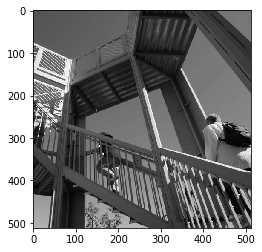

In [2]:
im = sc.misc.ascent()
plt.imshow(im, cmap='gray', vmin = 0, vmax = 255)
plt.show()

Nous allons maintenant afficher l'histogramme des niveaux de gris de cette image, grace à la fonction suivante: 

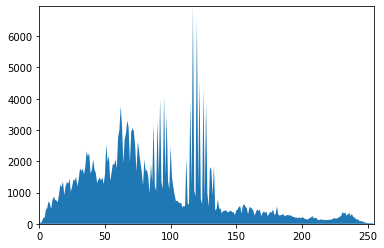

In [3]:
def hist(im):
  h,x = np.histogram(im,bins=255,range=(0,255))
  plt.fill_between(x[:-1],0,h)
  plt.axis((0,255,0,np.max(h)))
      ##[xmin,xmax,ymin,ymax])

hist(im)
plt.show()

Expliquez à quoi servent les fonctions `np.histogram`, `plt.fill_between` et `plt.axis`.

Que pouvez vous dire sur l'image en regardant son histogramme ? 

3 - Éclaircir et assombrir une image
-----

Nous allons dans un premier temps chercher à éclaircir l'image. Pour cela, nous allons augmenter l'ensemble des valeurs des niveaux de gris des pixels. Il faut néanmoins faire en sorte que les valeurs restent entre 0 et 255.

Éclaicir l'image:
![Histogramme 1](./hist1.jpeg)

Assombrir l'image:
![Histogramme 1](./hist2.jpeg)

Soit $n$ notre paramètre de réglage de l'effet. $n$ Varie entre 0 (aucun effet) et 255 (effet maximal, l'image devient entièrement blanche). Réalisez un programme qui sature (mettre à 255) les pixels dont la valeur de départ est supérieure à $255-n$ et augmente de $n$ les autres pixels.   

In [4]:
def eclaicir(im,n):
    # a compléter
    im[im > 255 - n] = 255
    im[im <= 255 -n] +=n
    return im

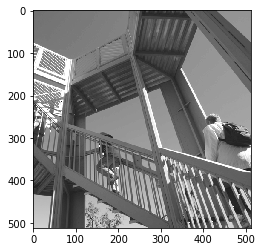

In [5]:
n = 30
im2 = eclaicir(im,n)
plt.imshow(im2,cmap='gray',vmin=0,vmax=255)
plt.show()

Affichez l'histogramme avant et après l'éclaircissement et regarder les conséquences du traitement pour différentes valeurs de $n$.

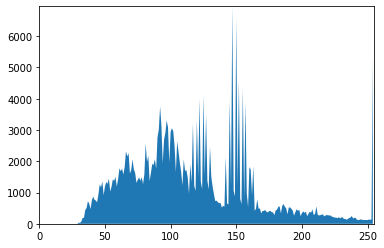

In [6]:
def hist(im):
  h,x = np.histogram(im,bins=255,range=(0,255))
  plt.fill_between(x[:-1],0,h)
  plt.axis((0,255,0,np.max(h)))
                ##[xmin,         xmax,                ymin,      ymax])

hist(im)
plt.show()

Réalisez maintenant l'effet inverse. Les valeurs inférieures à $n$ doivent être ramenées à 0 et les autres doivent être réduites de $n$.

In [7]:
def assombrir(im,n):
    # a compléter
    im[im < n] = 0
    im[im >= n] -= n
    return im

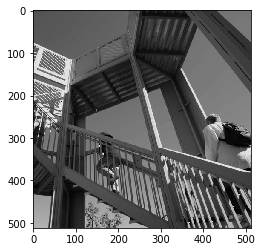

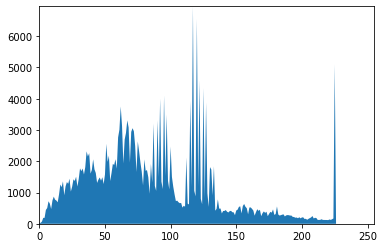

In [8]:
n = 30
im2 = assombrir(im,n)
plt.imshow(im2,cmap='gray',vmin=0,vmax=255)
plt.figure()
hist(im2)
plt.show()

Étirement d'histogramme (comparaison numpy/python seul)
---

L'objectif de cet exercice est d'étirer l'histogramme d'une image, en appliquant aux niveaux de gris des pixels une transformation affine telle que le plus petit niveau de gris aura, pour valeur 0 et le plus grand 255, après transformation des niveaux de gris.

Étirement d'histogramme:
![image absente](hist3.jpeg)

Nous utiliserons pour cela deux méthodes et comparerons l'efficacité de ces deux méthodes.


Mais auparavant, vous commencerez par charger l'image face\_gris.png (fournie sur ecampus) en mémoire dans la variable `im` et vous l'afficherez à l'écran. La lecture d'une image sur disque peut se faire au moyen de la fonction ` plt.imread` de la librairie *matplotlib*. L'affichage peut se faire à l'aide de la fonction `plt.imshow(im,cmap='gray',vmin=0,vmax=255)` de matplotlib. L'option `cmap='gray'` permet de préciser que l'image est en noir et blanc. `vmin = 0` et `vmax = 255` permet de préciser que les pixels sont définis  par des valeurs allant de 0 (noir) à 255 (blanc).

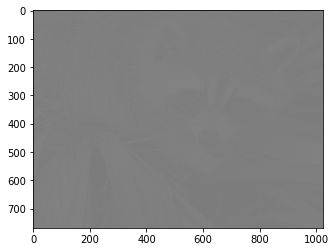

In [17]:
im = (plt.imread('face_gris.png')*256).astype('int') # lit l'image et ramène les entiers sur des entiers entre 0 et 255
plt.imshow(im, cmap='gray', vmin=0, vmax=255)
plt.show()

**Première méthode: utilisation de boucles**

Visualisez l'histogramme de cette image. Que pouvez-vous dire sur la répartition des différents niveaux de gris ? 

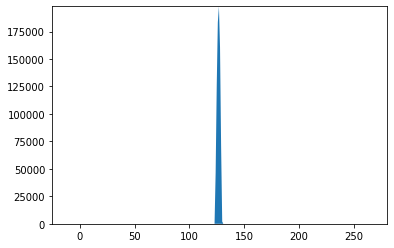

In [18]:
hist(im)
plt.show()

À l’aide d’instruction `if` et `for` (en utilisant que du code python 3 de base) écrivez une fonction qui trouve la valeur minimale et maximale des pixels de l’image. Nous les noterons $p_{min}$ et $p_{max}$ dans la suite du sujet.

In [19]:
def min_max_image(im):
   # a faire
    p_min = 255
    p_max = 0
    for i in range(im.shape[0]):
        for j in range(im.shape[1]):
            if im[i,j] < p_min:
                p_min = im[i,j]
            if im[i,j] > p_max:
                p_max = im[i,j]
    return p_min, p_max


In [20]:
p_min,p_max = min_max_image(im)
print('P_min=',p_min,'P_max=',p_max)

P_min= 124 P_max= 130


À l'aide d'instructions `if` et `for` faites une fonction qui crée une nouvelle image dont les pixels correspondent à l'équation $255\dfrac{p_{ij} - p_{min}}{p_{max}-p_{min}}$ où $p_{ij}$ est le pixel de la ligne $i$ et de la colonne $j$. Cette opération consiste à ramener les valeurs effectives des pixels entre 0 et 255 et forcer ainsi l'utilisation de toute la plage de valeur possible.

Pour cette question vous calculerez les nouveaux pixels, pixel par pixel, à l'aide de l'image d'origine. Pour simplifier l'initialisation, vous pouvez commencer avec une image noir avec l'instruction: im2 = np.zeros(im.shape).  

In [21]:
def rehaussementHistogramme(im,p_min,p_max):
    # a faire
    im2 = np.zeros(im.shape)
    for i in range(im.shape[0]):
        for j in range(im.shape[1]):
            im2[i,j] = 255*(im[i,j] - p_min)/(p_max - p_min)
    return im2

In [22]:
%%time
# remarquez bien le temps d'execution de cette approche.
p_min,p_max = min_max_image(im)
im2 = rehaussementHistogramme(im,p_min,p_max)


Wall time: 1.2 s


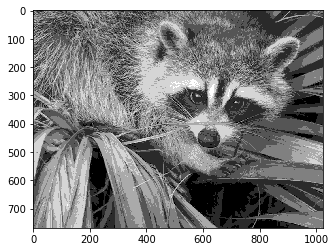

In [23]:
plt.imshow(im2,cmap='gray',vmin=0,vmax=255)
plt.show()


### 5.2 Seconde méthode : utilisation de numpy

Utilisez maintenant les fonctions numpy: `np.min` et `np.max` pour calculer la valeur minimale et maximale des pixels de l'image. Effectuez le même traitement que pour la méthode précédente, mais cette fois-ci sans boucle, en traitement l'ensemble de l'image en même temps grâce aux opérations mathématiques sur les tableaux numpy.


In [24]:
%%time
print("Valeur minimal : " + str(np.min(im2)))
print("Valeur maximal : " + str(np.max(im2)))

def rehaussementHistogrammeWithOnlyNumpy(im, p_min, p_max):
    return 255*(im - np.min(im))/(np.max(im) - np.min(im))

Valeur minimal : 0.0
Valeur maximal : 255.0
Wall time: 4 ms


Comparez les images obtenues avec les deux approches. Que pouvez-vous dire des temps d'exécutions dans les deux cas ?

In [ ]:
%%time
# remarquez bien le temps d'execution de cette approche.
p_min,p_max = min_max_image(im)
im3 = rehaussementHistogrammeWithOnlyNumpy(im,p_min,p_max)
plt.imshow(im3, cmap='gray', vmin=0, vmax=255)
plt.show()

6 - Rehaussement de contraste
-----

Pour rehausser les contrastes d'une image, il faut accentuer l'écart entre les tons clairs et les tons foncés. Pour cela, il faut assombrir davantage les pixels sombres et éclaircir les pixels clairs. 

Afin d'obtenir ce résultat, nous allons appliquer aux pixels de l'image une fonction qui augmente les valeurs déjà fortes et diminue les valeurs plus faibles. Généralement on prend pour faire cette opération une courbe en forme de "S".  

Affichez sur la même figure les fonctions $y = x$ et $y = 0.5\cos( (1-x)\pi) + 0.5$ entre 0 et 1. Vous utiliserez `np.pi` pour avoir la valeur de $\pi$.

In [ ]:
x = np.arange(0, 1, 1e-6)
fy = x
fy1 = 0.5*np.cos((1-x)*np.pi) + 0.5
plt.plot(x, fy)
plt.plot(x, fy1)
plt.show()

Reprenez la première images vue dans ce TP et divisez toutes ces valeurs par 255.0 pour avoir des valeurs comprises entre 0 et 1.

In [ ]:
im_div = im/255.0

Prenez l'image de la question précédente et appliquez lui la courbe en S vu dans la première question de cette partie.

In [ ]:
fim2 = 0.5*np.cos((1-im_div)*np.pi) + 0.5


Repassez toutes les valeurs entre 0 et 255 en multipliant l'image de la question précédente par 255.

In [ ]:
im_multi = fim2*255

Visualisez l'effet obtenu sur l'image et sur son histogramme.

In [ ]:
plt.subplot(1,2,1)
plt.imshow(im, cmap='gray')
plt.title('Avant')

plt.subplot(1,2,2)
plt.imshow(im_multi, cmap='gray')
plt.title('Apres')

plt.show()

Comparez les histogrammes avant et après. Que pouvez-vous dire sur l'effet sur les tons clairs, les tons foncés et les tons moyens ? 

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
hist(im)
plt.title('Avant')
plt.subplot(1,2,2)
hist(im_multi)
plt.title('Apres')
plt.show()
